In [100]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
import sys
from os import path
sys.path.insert(0, "../ISANet/")
sys.path.insert(0, "./")

from isanet.model import Mlp
from isanet.optimizer import SGD, NCG, LBFGS
from isanet.datasets.monk import load_monk
from isanet.utils.model_utils import printMSE, printAcc, plotHistory
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
def get_fitted_model(X_train, Y_train, optimizer, n_seed = 189, verbose = 1):
    np.random.seed(seed=n_seed)
    print("Build the model")
    model = Mlp()
    model.add(4, input= 17, kernel_initializer = 0.003, kernel_regularizer = 0.001)
    model.add(1, kernel_initializer = 0.003, kernel_regularizer = 0.001)

    model.set_optimizer(optimizer)

    model.fit(X_train,
            Y_train, 
            epochs=1200, 
            #batch_size=31,
            #validation_data = [X_test, Y_test],
            verbose=verbose)

    return model 



# Monk 3 ln_maxiter = 10

In [143]:
print("Load Monk DataSet")
X_train, Y_train = load_monk("3", "train")

seed = 874
ln_maxiter = 10
results = []

Load Monk DataSet


In [144]:
#############################
#          NCG hs
#############################

optimizer = NCG(beta_method="hs", c1=1e-4, ln_maxiter = ln_maxiter, c2=.9, tol = 1e-14)

model = get_fitted_model(X_train, Y_train, optimizer, seed, 1)
h_hs = model.history 

Build the model

Alpha: 0.08743317943303316 - norm_g: 3.4422283382295005
Epoch: 1 - time: 0.0040 - loss_train: 0.25072239457813345 - loss_val: 0

Beta: 0.3600638390538469 -> compute alpha: Alpha: 1.0 - norm_g: 1.4003295946052992
Epoch: 2 - time: 0.0020 - loss_train: 0.24214306689943602 - loss_val: 0

Beta: 6.869030972050874 -> compute alpha: Alpha: 0.499889233606507 - norm_g: 1.878745159480073
Epoch: 3 - time: 0.0020 - loss_train: 0.21837996724306022 - loss_val: 0

Beta: 12.147526639992973 -> compute alpha: Alpha: 1.0 - norm_g: 9.195592513638971
Epoch: 4 - time: 0.0020 - loss_train: 0.0655685683512261 - loss_val: 0

Beta: -0.0003174856056867945 -> compute alpha: Alpha: 16.0 - norm_g: 0.004268580049303031
Epoch: 5 - time: 0.0040 - loss_train: 0.06556404555782257 - loss_val: 0

Beta: -0.8868821535783072 -> compute alpha: Alpha: 0.0011520608381260218 - norm_g: 0.0033785415724812452
Epoch: 6 - time: 0.0040 - loss_train: 0.06556404560575196 - loss_val: 0

Beta: -0.5188155466238266 -> comput

In [145]:
#############################
#          NCG hs+
#############################

optimizer = NCG(beta_method="hs+", c1=1e-4, ln_maxiter = ln_maxiter, c2=.9, tol = 1e-14)

model = get_fitted_model(X_train, Y_train, optimizer, seed, 1)
h_hs_plus = model.history 

Build the model

Alpha: 0.08743317943303316 - norm_g: 3.4422283382295005
Epoch: 1 - time: 0.0040 - loss_train: 0.25072239457813345 - loss_val: 0

Beta: 0.3600638390538469 -> compute alpha: Alpha: 1.0 - norm_g: 1.4003295946052992
Epoch: 2 - time: 0.0030 - loss_train: 0.24214306689943602 - loss_val: 0

Beta: 6.869030972050874 -> compute alpha: Alpha: 0.499889233606507 - norm_g: 1.878745159480073
Epoch: 3 - time: 0.0030 - loss_train: 0.21837996724306022 - loss_val: 0

Beta: 12.147526639992973 -> compute alpha: Alpha: 1.0 - norm_g: 9.195592513638971
Epoch: 4 - time: 0.0020 - loss_train: 0.0655685683512261 - loss_val: 0

Beta: 0 -> compute alpha: Alpha: 8.0 - norm_g: 0.004268580049303031
Epoch: 5 - time: 0.0030 - loss_train: 0.06556634671785232 - loss_val: 0

Beta: 0 -> compute alpha: Alpha: 8.0 - norm_g: 0.0036967708087792686
Epoch: 6 - time: 0.0040 - loss_train: 0.06556465191944187 - loss_val: 0

Beta: 0 -> compute alpha: Alpha: 16.0 - norm_g: 0.0033120875243242798
Epoch: 7 - time: 0.0050

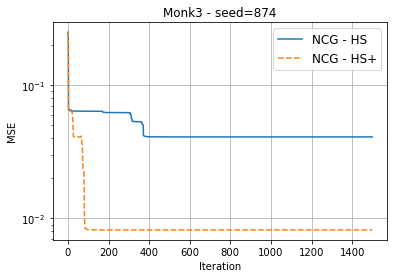

In [146]:
pos_train = (0,0)
figsize = (12, 4)

plt.plot(h_hs["loss_mse"], linestyle='-')
plt.plot(h_hs_plus["loss_mse"], linestyle = '--')
plt.title('Monk3 - seed={}'.format(seed))
plt.ylabel("MSE")
plt.xlabel('Iteration')
plt.grid()
plt.yscale('log')
plt.legend(['NCG - HS','NCG - HS+'], loc='upper right', fontsize='large')    
plt.show()


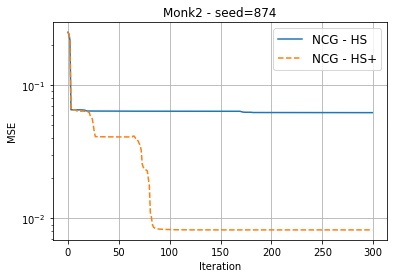

In [147]:
pos_train = (0,0)
figsize = (12, 4)
zoom = 300
plt.plot(h_hs["loss_mse"][:zoom], linestyle='-')
plt.plot(h_hs_plus["loss_mse"][:zoom], linestyle = '--')
plt.title('Monk2 - seed={}'.format(seed))
plt.ylabel("MSE")
plt.xlabel('Iteration')
plt.grid()
plt.yscale('log')
plt.legend(['NCG - HS','NCG - HS+'], loc='upper right', fontsize='large')    
plt.show()

In [151]:
print("Load Monk DataSet")
X_train, Y_train = load_monk("3", "train")

seed = 435
ln_maxiter = 10
results = []

#############################
#          NCG hs
#############################

optimizer = NCG(beta_method="hs", c1=1e-4, ln_maxiter = ln_maxiter, c2=.9, tol = 1e-14)

model = get_fitted_model(X_train, Y_train, optimizer, seed, 1)
h_hs = model.history 

#############################
#          NCG hs+
#############################

optimizer = NCG(beta_method="hs+", c1=1e-4, ln_maxiter = ln_maxiter, c2=.9, tol = 1e-14)

model = get_fitted_model(X_train, Y_train, optimizer, seed, 1)
h_hs_plus = model.history 

Load Monk DataSet
Build the model

Alpha: 0.0878795241595134 - norm_g: 3.366455624846799
Epoch: 1 - time: 0.0030 - loss_train: 0.24377975992695797 - loss_val: 0

Beta: 0.3937266541900837 -> compute alpha: Alpha: 4.0 - norm_g: 1.8299951976957993
Epoch: 2 - time: 0.0040 - loss_train: 0.07298988090429187 - loss_val: 0

Beta: 0.5241204909758831 -> compute alpha: Alpha: 0.4957954990234208 - norm_g: 1.7044407167868687
Epoch: 3 - time: 0.0030 - loss_train: 0.07102707996333596 - loss_val: 0

Beta: 2.6187435573288833 -> compute alpha: Alpha: 1.0 - norm_g: 3.3655389297680545
Epoch: 4 - time: 0.0020 - loss_train: 0.056453785567773 - loss_val: 0

Beta: 0.6440453305306072 -> compute alpha: Alpha: 0.6183902294245345 - norm_g: 1.2679269719623265
Epoch: 5 - time: 0.0040 - loss_train: 0.041947334508807145 - loss_val: 0

Beta: -0.1806108568439679 -> compute alpha: Alpha: 0.498447844631607 - norm_g: 0.6522912117541796
Epoch: 6 - time: 0.0030 - loss_train: 0.04060036988522503 - loss_val: 0

Beta: 2.793315

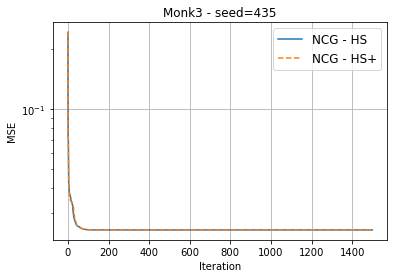

In [152]:
pos_train = (0,0)
figsize = (12, 4)

plt.plot(h_hs["loss_mse"], linestyle='-')
plt.plot(h_hs_plus["loss_mse"], linestyle = '--')
plt.title('Monk3 - seed={}'.format(seed))
plt.ylabel("MSE")
plt.xlabel('Iteration')
plt.grid()
plt.yscale('log')
plt.legend(['NCG - HS','NCG - HS+'], loc='upper right', fontsize='large')    
plt.show()


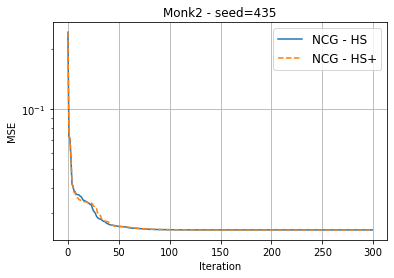

In [153]:
pos_train = (0,0)
figsize = (12, 4)
zoom = 300
plt.plot(h_hs["loss_mse"][:zoom], linestyle='-')
plt.plot(h_hs_plus["loss_mse"][:zoom], linestyle = '--')
plt.title('Monk2 - seed={}'.format(seed))
plt.ylabel("MSE")
plt.xlabel('Iteration')
plt.grid()
plt.yscale('log')
plt.legend(['NCG - HS','NCG - HS+'], loc='upper right', fontsize='large')    
plt.show()